In [1]:
#5.2 example: Convnet from scratch on a small dataset
#Small dataset can be a few 100 to a few 1000 images
#This however will get you ~70% accuracy - mainly because of over-fitting
#Data augmentation brings it up to 81%
#Two more essential techniques for small sets:
#1)feature extraction with a pre-trained network (will get you 90% to 96% accuracy)
#2) fine-tuning a pre-trained network (97%)

In [2]:
import sys;print('python version:',sys.version) 
import tensorflow as tf;print('tf_version:',tf.__version__) #tf: 2.1 
from tensorflow import keras; print('keras version:',keras.__version__) 
import keras 
print("keras version on its own:",keras.__version__) #tf keras and keras library can have different versions
from tensorflow.python.platform import build_info as tf_build_info 
#print('CUDA Version:',tf_build_info.cuda_version_number) 
#print('CUDNN Version:',tf_build_info.cudnn_version_number)


python version: 3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 21:14:29) 
[GCC 7.3.0]
tf_version: 1.14.0
keras version: 2.2.4-tf
keras version on its own: 2.2.4


Using TensorFlow backend.


In [3]:
import tensorflow as tf
tf.test.is_gpu_available() # True/False

# Or only check for gpu's with cuda support
tf.test.is_gpu_available(cuda_only=True) 
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5976692768504508166
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13906163561746969701
physical_device_desc: "device: XLA_CPU device"
]


In [4]:

import os, shutil
# The path to the directory where the original
# dataset was uncompressed
#Comment out os.mkdir(X) after the 1st run or add an if condition like if os.exist -something like that 

original_dataset_dir = '/home/oj/Downloads/dogs-vs-cats/train'

# The directory where we will
# store our smaller dataset
base_dir = '/home/oj/Downloads/cats_and_dogs_small'
#os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)


# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


FileNotFoundError: [Errno 2] No such file or directory: '/home/oj/Downloads/dogs-vs-cats/train/cat.0.jpg'

In [6]:
#Sanity Check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [8]:
#Model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) #input shape is arbitray choice. The actual cat/dog images are greather than this size
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #one more convnet and max pooling layer from 5.1 example. This augments the network and resuces the size of the feature map so they are not too large when they reach the flatten layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) #network of 512 dense layers
model.add(layers.Dense(1, activation='sigmoid')) #either cat or dog
model.summary() #depth of the feature map is increasing from 32 to 128 but the size is decreasing from 148*148 to 7*7

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [9]:
#model compile: setting the loss function; optimizer
from keras import optimizers
#Making network/model ready for training
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc']) #Metrics to monitor during training and testing—Here, we’ll only care about accuracy(the fraction of the images that were correctly classified).


In [10]:
#Data pre-processing. Requires following:
#jpg>RGB channels>floating point tensors> normalize or rescale the pixel values from 0-255 to [0,1]
#Keras' IamgeDataGenerator class takes care of that
#by this step, should give you the input image as a tensor and associated labels for training

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the target directory
        target_size=(150, 150),# All images will be resized to 150x150
        batch_size=20, #every epoch, 2000 images are drawn in a batch of 20, 100 times
        class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

#check output of the tensors
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape) #output is x samples of 150x150*RGB. where x is the batch size
    print('labels batch shape:', labels_batch.shape) #binary labels. shape same as batch size
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [8]:
#fitting the data (answers, input images) into the model/network is the same as training it
history = model.fit_generator( #model.fit - we name it history? interesting
      train_generator, #aboove train generator
      steps_per_epoch=100, #samples per epoch. total train_images/batch_size. Our case 2000/20=100; 2000 is cat+dog; takes these many gradien steps before going to the next epoch
      epochs=30,
      validation_data=validation_generator, #can be tuple or a data generator; but if latter then you should specify val_steps that tell the process how many batches to draw from the validation generator; otherwise, goes on forever
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 8s 76ms/step - loss: 0.6952 - acc: 0.5315 - val_loss: 0.6769 - val_acc: 0.5950
Epoch 2/30
100/100 [==============================] - 6s 59ms/step - loss: 0.6564 - acc: 0.6150 - val_loss: 0.6422 - val_acc: 0.6270
Epoch 3/30
100/100 [==============================] - 6s 59ms/step - loss: 0.6143 - acc: 0.6645 - val_loss: 0.6182 - val_acc: 0.6500
Epoch 4/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5722 - acc: 0.7150 - val_loss: 0.6259 - val_acc: 0.6390
Epoch 5/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5385 - acc: 0.7290 - val_loss: 0.5945 - val_acc: 0.6650
Epoch 6/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5114 - acc: 0.7440 - val_loss: 0.5667 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 6s 61ms/step - loss: 0.4769 - acc: 0.7780 - val_loss: 0.5579 - val_acc: 0.7010
Epoch 8/30
100/100 [==============================] - 6s 62ms/step - 

In [9]:
#Save ya model - good practice
model.save('cats_and_dogs_small_1.h5')

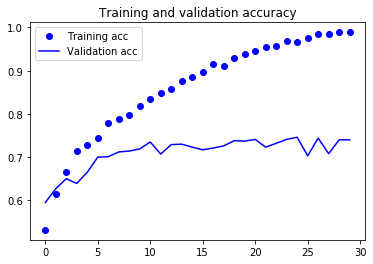

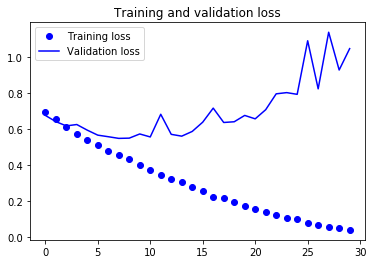

In [10]:
#plot the loss and accuracy of the model over the training and validation data during training

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
#0.1 in y-axis is 10%; x-axis=epochs
#This plot is characteristic of over-fitting.
#Validation accuracy caps at 0.7 and loss increases over the epochs. 
#Why do we not see that with training? Is it because training images 2000 are double in number 1000?
#To couter over-fitting, use dropout, weight decay (L2 regularization) and data augmentation

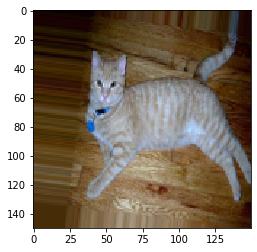

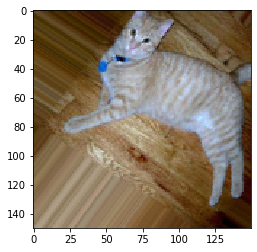

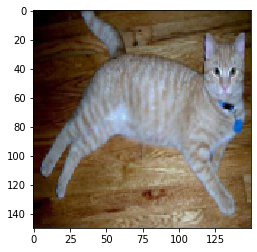

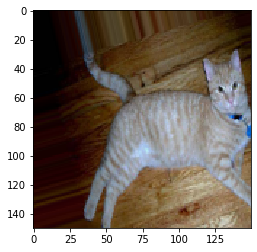

In [22]:
####5.2.5 - Data Augmentation####
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')



# This is module with image preprocessing utilities
from keras.preprocessing import image
import matplotlib.pyplot as plt
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
#print(os.path.join(train_cats_dir, fname))  #path
#print(os.listdir(train_cats_dir))  #images in path - train folder has 2000

img_path = fnames[3] # We pick one image to "augment"
img = image.load_img(img_path, target_size=(150, 150)) # Read the image and resize it

x = image.img_to_array(img) # Convert it to a Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)# Reshape it to (1, 150, 150, 3)


# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0: #break at 4 images
        break
plt.show()
#Till now just 1 images is augmented and not 2000 (cat+dog)?

In [15]:
#data augmentation creates more info from existing info or images, which may not be enough for overfitting;
#so, we add a dropout layer before the densely connected layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [23]:
#Let's train our network using data augmentation and dropout

##Data Preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32, #generally, sample or gradient draws are steps_per_epoch = tol samples/batch size. 
    #In this case, 32 original images are picked, randomly tranformed and trained for this epoch;
    #these images are not created on the drive for example 32 images are not transfored into x more, but in memory on the fly;
    #in the next epoch, same 32 orig images are picked and randomly transformed. Program never sees orig. images
    #why 32 though?
        
        class_mode='binary')# Since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32, #val batch size could be anything? Yes, it is generated by an iterator, so you define it.
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 21s 205ms/step - loss: 0.6922 - acc: 0.5259 - val_loss: 0.7003 - val_acc: 0.4943
Epoch 2/100
100/100 [==============================] - 19s 191ms/step - loss: 0.6859 - acc: 0.5497 - val_loss: 0.6705 - val_acc: 0.5654
Epoch 3/100
100/100 [==============================] - 20s 195ms/step - loss: 0.6767 - acc: 0.5788 - val_loss: 0.6497 - val_acc: 0.6142
Epoch 4/100
100/100 [==============================] - 20s 201ms/step - loss: 0.6616 - acc: 0.5869 - val_loss: 0.6561 - val_acc: 0.5838
Epoch 5/100
100/100 [==============================] - 20s 202ms/step - loss: 0.6446 - acc: 0.6209 - val_loss: 0.6518 - val_acc: 0.6110
Epoch 6/100
100/100 [==============================] - 21s 215ms/step - loss: 0.6299 - acc: 0.6400 - val_loss: 0.6012 - val_acc: 0.6497
Epoch 7/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6129 - acc: 0.6591 -

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, #steps_per_epoch = total images/batch size. Total images =3200?
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [24]:
#save the model
model.save('cats_and_dogs_small_2.h5')

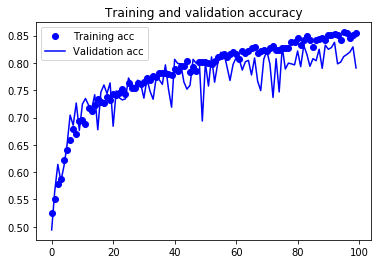

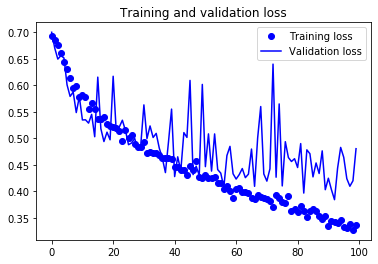

In [25]:
#Plot the results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#how come val accuracy increased if we did not augment its data?